In [1]:
import json
from matplotlib import pyplot as plt
import os 

figure_path = "/Users/Elias/vagueness/figures"
def parse_results(json_path):
    with open(json_path) as f1:
        data = json.load(f1)
    to_ret = {}
    for line in data:
        to_ret[line["question_id"]] = line
    return to_ret

def parse_inputs(json_path):
    to_ret = {}
    with open(json_path) as f1:
        data = json.load(f1) 
    for instance in data:
        instance_dict = {"qid": instance["question_id"],
                         "sent": instance["sent"],
                         "answers": instance["score_answers"],
                         "mean_ans": sum(instance["score_answers"])/len(instance["score_answers"]), 
                         "img_id": instance["img_id"]
                        }
        to_ret[instance["question_id"]] = instance_dict
    return to_ret
    
        

In [17]:


def simple_plot(inputs_path, results_path):
    """
    simple plot for comparing the results 
    """
    split = os.path.basename(inputs_path).split(".")[0]
    inputs = parse_inputs(inputs_path)
    results = parse_results(results_path)
    
    to_plot_human_scores = []
    to_plot_colors = []
    to_plot_yes = []
    to_plot_no = []
    to_plot_xs = []
    
    # sort inputs by mean answer
    sorted_inputs = sorted(inputs.items(), key = lambda x: x[1]["mean_ans"])
    keys = [x[0] for x in sorted_inputs]
    
    for i, qid in enumerate(keys):
        input_data = inputs[qid]
        result_data = results[qid]
        
        
#         try:
        to_plot_human_scores.append(input_data["mean_ans"])
        to_plot_yes.append(result_data["answer"]["yes"])
        to_plot_no.append(result_data["answer"]["no"])
        to_plot_xs.append(i)
        if input_data["mean_ans"] > 0.5:
            color = "True"
        else:
            color = "False"
        to_plot_colors.append(color)

#         except KeyError:
#             continue
            
    
    markers = {"True": "." ,
           "False": "."}
    
    palette = {"True": '#4575b4' ,
           "False": '#d73027'}
            
    # VERSION 1
    plt.figure()
    fig, axs = plt.subplots(3, 1, sharex='col', figsize=(6,6))
    for x, y, c in zip(to_plot_xs, to_plot_human_scores, to_plot_colors):
        axs[0].scatter([x], [y], s = 150, marker = markers[c], color = palette[c])

    for x, y, c in zip(to_plot_xs, to_plot_yes, to_plot_colors):
        axs[1].scatter([x], [y], s = 150, marker = markers[c], color = palette[c])  
    
    for x, y, c in zip(to_plot_xs, to_plot_no, to_plot_colors):
        axs[2].scatter([x], [y], s = 150, marker = markers[c], color = palette[c])  
        

    axs[1].set_yticks([0.0, 1.0])
    axs[1].set_yticklabels([0.0, 1.0])
    for i in range(len(axs)):
        axs[i].set_xticks([])
        axs[i].set_xticklabels([])
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['top'].set_visible(False)
    #     axs[i].spines['bottom'].set_visible(False)
    #     axs[i].spines['left'].set_visible(False)
    # axs[0].spines['bottom'].set_visible(True)
    plt.tight_layout()
    plt.savefig(os.path.join(figure_path, f"{split}.pdf")) 


<Figure size 432x288 with 0 Axes>

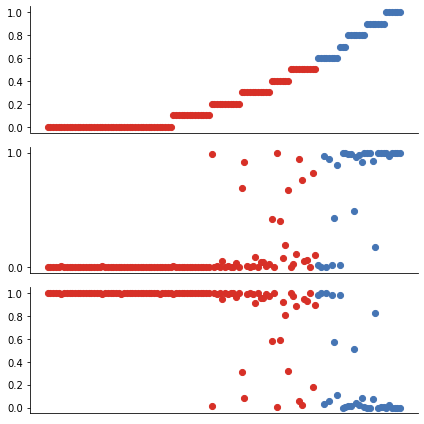

In [18]:
simple_plot("/Users/Elias/vagueness/data/output_new_scored.json", "/Users/Elias/vagueness/results/output_new_scored.json")

<Figure size 432x288 with 0 Axes>

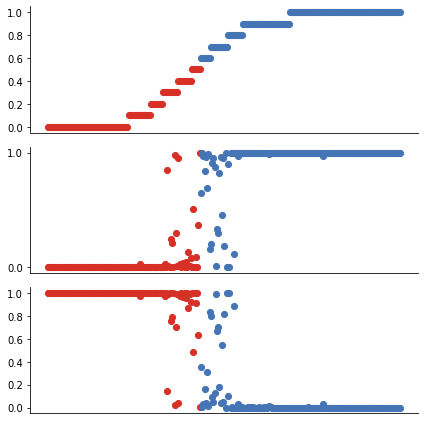

In [19]:
simple_plot("/Users/Elias/vagueness/data/output_sunny_scored.json", "/Users/Elias/vagueness/results/output_sunny_scored.json")

<Figure size 432x288 with 0 Axes>

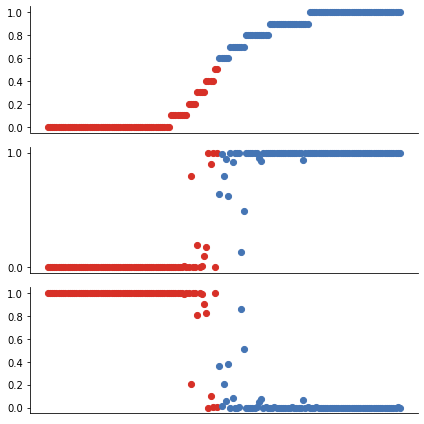

In [20]:
simple_plot("/Users/Elias/vagueness/data/output_cloudy_scored.json", "/Users/Elias/vagueness/results/output_cloudy_scored.json")

In [33]:
def calculate_accuracy(inputs_path, results_path, skip_nonvague = False):
    split = os.path.basename(inputs_path).split(".")[0]
    inputs = parse_inputs(inputs_path)
    results = parse_results(results_path)
    
    correct = 0.0 
    total = 0.0 
    for qid in inputs.keys():

        inp = inputs[qid]
        out = results[qid]
#         inp_score = sum(inp["answers"])/len(inp["answers"])
        inp_score = inp["answers"][0]
        out_score = out["answer"]["yes"]
        
        # skip non-vague
        if skip_nonvague and inp["mean_ans"] == 0 or inp["mean_ans"] == 1:
            continue 
        
        if inp_score < 0.5 and out_score < 0.5 or inp_score >= 0.5 and out_score >= 0.5:
             correct += 1
                
        total += 1
    return "%0.2f" % (correct/total * 100)

            
    
new_acc = calculate_accuracy("/Users/Elias/vagueness/data/output_new_scored.json", 
                             "/Users/Elias/vagueness/results/output_new_scored.json")
print(f"New total {new_acc}") 
new_acc_vague = calculate_accuracy("/Users/Elias/vagueness/data/output_new_scored.json", 
                                      "/Users/Elias/vagueness/results/output_new_scored.json", 
                                      skip_nonvague=True)
print(f"New vague only {new_acc_vague}") 
      
sunny_acc = calculate_accuracy("/Users/Elias/vagueness/data/output_sunny_scored.json", 
                               "/Users/Elias/vagueness/results/output_sunny_scored.json")
print(f"Sunny total {sunny_acc}") 
sunny_acc_vague = calculate_accuracy("/Users/Elias/vagueness/data/output_sunny_scored.json", 
                               "/Users/Elias/vagueness/results/output_sunny_scored.json",
                              skip_nonvague=True)
print(f"Sunny vague only {sunny_acc_vague}") 
      
    
cloudy_acc = calculate_accuracy("/Users/Elias/vagueness/data/output_cloudy_scored.json", 
                                "/Users/Elias/vagueness/results/output_cloudy_scored.json")
print(f"Cloudy total {cloudy_acc}")
cloudy_acc_vague = calculate_accuracy("/Users/Elias/vagueness/data/output_cloudy_scored.json", 
                                "/Users/Elias/vagueness/results/output_cloudy_scored.json",
                               skip_nonvague=True)
print(f"Cloudy vague only {cloudy_acc_vague}")
    

New total 75.81
New vague only 61.54
Sunny total 84.62
Sunny vague only 76.92
Cloudy total 84.87
Cloudy vague only 71.43
